In [48]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
data = pd.read_csv('train.csv/train.csv')
data2 = pd.read_csv('macro.csv/macro.csv')
test = pd.read_csv('test.csv/test.csv')

In [50]:
len(data2)

2484

In [51]:
len(test)

7662

In [52]:
len(data2.columns)

100

In [53]:
len(test.columns)

291

In [54]:
len(data['id'])

30471

In [55]:
data.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [56]:
#data = data.merge(data2, left_on='timestamp', right_on='timestamp', how='left')

In [57]:
#test = test.merge(data2, left_on='timestamp', right_on='timestamp', how='left')

In [58]:
len(data.columns)

292

In [59]:
len(test.columns)

291

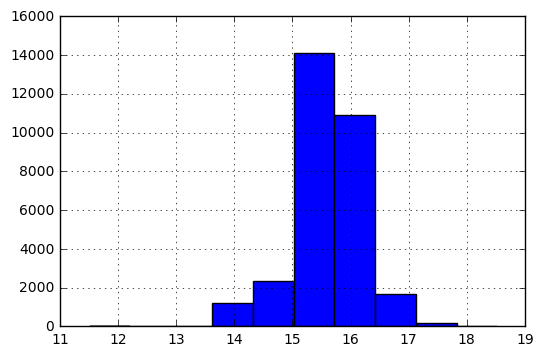

In [60]:
%matplotlib inline
np.log(data['price_doc']).hist()

### Finding how many categorical variables are there in the data

In [61]:
len([data[x].dtype.name for x in data.columns if data[x].dtype.name=='object' ])

16

### Separating categorical and numerical variables

In [62]:
cats = [x for x in data.columns if data[x].dtype.name == 'object']
#print('\nCategorical:\n',cats)
nums = [x for x in data.columns if data[x].dtype.name != 'object']
#print('\nNumeric:\n',nums)

In [63]:
len(nums)

276

In [64]:
nums.remove('id')
nums.remove('price_doc')
len(nums)

274

### Finding number of levels of each categorical variable

In [65]:
cat_level = {}
for level in cats:
    cat_level[level] = data[level].nunique()
print(cat_level)

{'radiation_raion': 2, 'timestamp': 1161, 'culture_objects_top_25': 2, 'detention_facility_raion': 2, 'water_1line': 2, 'product_type': 2, 'railroad_1line': 2, 'big_market_raion': 2, 'nuclear_reactor_raion': 2, 'ecology': 5, 'big_road1_1line': 2, 'sub_area': 146, 'oil_chemistry_raion': 2, 'thermal_power_plant_raion': 2, 'incineration_raion': 2, 'railroad_terminal_raion': 2}


### Finding which columns have missing values

In [66]:
missingCat = {}
for level in cats:
    if data[level].isnull().sum()>0:
        missingCat[level] = data[level].isnull().sum()
print('Categorical:\n', missingCat)
print('\nNumber of Categorical columns with missing values: ',len(missingCat))

missingNum = {}
for level in nums:
    if data[level].isnull().sum()>0:
        missingNum[level] = data[level].isnull().sum()
print('\n\nNumeric:\n', missingNum)
print('\nNumber of Numeric columns with missing values: ',len(missingNum))

Categorical:
 {}

Number of Categorical columns with missing values:  0


Numeric:
 {'preschool_quota': 6688, 'build_count_1946-1970': 4991, 'build_count_before_1920': 4991, 'school_quota': 6685, 'railroad_station_walk_min': 25, 'build_count_slag': 4991, 'cafe_avg_price_1000': 6524, 'state': 13559, 'cafe_avg_price_3000': 991, 'build_count_monolith': 4991, 'ID_railroad_station_walk': 25, 'build_count_foam': 4991, 'cafe_sum_1500_max_price_avg': 4199, 'build_count_1921-1945': 4991, 'build_count_mix': 4991, 'build_count_block': 4991, 'max_floor': 9572, 'cafe_sum_1000_max_price_avg': 6524, 'cafe_sum_500_max_price_avg': 13281, 'cafe_avg_price_500': 13281, 'build_count_brick': 4991, 'cafe_sum_1000_min_price_avg': 6524, 'kitch_sq': 9572, 'life_sq': 6383, 'prom_part_5000': 178, 'cafe_avg_price_5000': 297, 'cafe_avg_price_1500': 4199, 'material': 9572, 'cafe_sum_5000_max_price_avg': 297, 'cafe_sum_1500_min_price_avg': 4199, 'cafe_sum_3000_min_price_avg': 991, 'build_year': 13605, 'build_count_fr

### Split data into train and validation

In [67]:
train,valid = train_test_split(data, test_size=0.4, random_state=42)

In [68]:
print("Number of observations in original data: ",len(data) )
print("\nNumber of observations in Train: ",len(train))
print("\nNumber of observations in Validation: ",len(valid))
print("\nTrain + Validation: ",len(train)+len(valid))

Number of observations in original data:  30471

Number of observations in Train:  18282

Number of observations in Validation:  12189

Train + Validation:  30471


### Finding which columns have missing values in train data


In [69]:
missingCatTrain = {}
for level in cats:
    if train[level].isnull().sum()>0:
        missingCatTrain[level] = train[level].isnull().sum()
print('Categorical:\n', missingCatTrain)
print('\nNumber of Categorical columns with missing values: ',len(missingCatTrain))

missingNumTrain = {}
for level in nums:
    if train[level].isnull().sum()>0:
        missingNumTrain[level] = train[level].isnull().sum()
print('\n\nNumeric:\n', missingNumTrain)
print('\nNumber of Numeric columns with missing values: ',len(missingNumTrain))

Categorical:
 {}

Number of Categorical columns with missing values:  0


Numeric:
 {'preschool_quota': 4077, 'build_count_1946-1970': 3064, 'build_count_before_1920': 3064, 'school_quota': 4076, 'railroad_station_walk_min': 14, 'build_count_slag': 3064, 'cafe_avg_price_1000': 3928, 'state': 8163, 'cafe_avg_price_3000': 601, 'build_count_monolith': 3064, 'ID_railroad_station_walk': 14, 'build_count_foam': 3064, 'cafe_sum_1500_max_price_avg': 2498, 'build_count_1921-1945': 3064, 'build_count_mix': 3064, 'build_count_block': 3064, 'max_floor': 5741, 'cafe_sum_1000_max_price_avg': 3928, 'cafe_sum_500_max_price_avg': 7998, 'cafe_avg_price_500': 7998, 'build_count_brick': 3064, 'cafe_sum_1000_min_price_avg': 3928, 'kitch_sq': 5741, 'life_sq': 3851, 'prom_part_5000': 119, 'cafe_avg_price_5000': 190, 'cafe_avg_price_1500': 2498, 'material': 5741, 'cafe_sum_5000_max_price_avg': 190, 'cafe_sum_1500_min_price_avg': 2498, 'cafe_sum_3000_min_price_avg': 601, 'build_year': 8166, 'build_count_frame'

### Finding which columns have missing values in validation data

In [70]:
missingCatV = {}
for level in cats:
    if valid[level].isnull().sum()>0:
        missingCatV[level] = valid[level].isnull().sum()
print('Categorical:\n', missingCatV)
print('\nNumber of Categorical columns with missing values: ',len(missingCatV))

missingNumV = {}
for level in nums:
    if valid[level].isnull().sum()>0:
        missingNumV[level] = valid[level].isnull().sum()
print('\n\nNumeric:\n', missingNumV)
print('\nNumber of Numeric columns with missing values: ',len(missingNumV))

Categorical:
 {}

Number of Categorical columns with missing values:  0


Numeric:
 {'preschool_quota': 2611, 'build_count_1946-1970': 1927, 'build_count_before_1920': 1927, 'school_quota': 2609, 'railroad_station_walk_min': 11, 'build_count_slag': 1927, 'cafe_avg_price_1000': 2596, 'state': 5396, 'cafe_avg_price_3000': 390, 'build_count_monolith': 1927, 'ID_railroad_station_walk': 11, 'build_count_foam': 1927, 'cafe_sum_1500_max_price_avg': 1701, 'build_count_1921-1945': 1927, 'build_count_mix': 1927, 'build_count_block': 1927, 'max_floor': 3831, 'cafe_sum_1000_max_price_avg': 2596, 'cafe_sum_500_max_price_avg': 5283, 'cafe_avg_price_500': 5283, 'build_count_brick': 1927, 'cafe_sum_1000_min_price_avg': 2596, 'kitch_sq': 3831, 'life_sq': 2532, 'prom_part_5000': 59, 'cafe_avg_price_5000': 107, 'cafe_avg_price_1500': 1701, 'material': 3831, 'cafe_sum_5000_max_price_avg': 107, 'cafe_sum_1500_min_price_avg': 1701, 'cafe_sum_3000_min_price_avg': 390, 'build_year': 5439, 'build_count_frame':

### Finding which columns have missing values in test data

In [71]:
missingCatTest = {}
for level in cats:
    if test[level].isnull().sum()>0:
        missingCatTest[level] = test[level].isnull().sum()
print('Categorical:\n', missingCatTest)
print('\nNumber of Categorical columns with missing values: ',len(missingCatTest))

missingNumTest = {}
for level in nums:
    if test[level].isnull().sum()>0:
        missingNumTest[level] = test[level].isnull().sum()
print('\n\nNumeric:\n', missingNumTest)
print('\nNumber of Numeric columns with missing values: ',len(missingNumTest))

Categorical:
 {'product_type': 33}

Number of Categorical columns with missing values:  1


Numeric:
 {'preschool_quota': 1596, 'build_count_1946-1970': 1218, 'build_count_before_1920': 1218, 'school_quota': 1595, 'railroad_station_walk_min': 34, 'build_count_slag': 1218, 'cafe_avg_price_1000': 1222, 'state': 694, 'cafe_avg_price_3000': 182, 'build_count_monolith': 1218, 'ID_railroad_station_walk': 34, 'build_count_foam': 1218, 'cafe_sum_1500_max_price_avg': 821, 'build_count_1921-1945': 1218, 'build_count_mix': 1218, 'build_count_1971-1995': 1218, 'cafe_sum_1000_max_price_avg': 1222, 'cafe_sum_500_max_price_avg': 3159, 'cafe_avg_price_500': 3159, 'build_count_brick': 1218, 'cafe_sum_1000_min_price_avg': 1222, 'life_sq': 1176, 'prom_part_5000': 92, 'cafe_avg_price_5000': 128, 'cafe_avg_price_1500': 821, 'cafe_sum_5000_max_price_avg': 128, 'cafe_sum_1500_min_price_avg': 821, 'metro_km_walk': 34, 'build_year': 1049, 'build_count_frame': 1218, 'build_count_panel': 1218, 'cafe_sum_3000_max

### Imputing numeric missing

#### Train:

In [72]:
print(list(missingNumTrain.keys()))

['preschool_quota', 'build_count_1946-1970', 'build_count_before_1920', 'school_quota', 'railroad_station_walk_min', 'build_count_slag', 'cafe_avg_price_1000', 'state', 'cafe_avg_price_3000', 'build_count_monolith', 'ID_railroad_station_walk', 'build_count_foam', 'cafe_sum_1500_max_price_avg', 'build_count_1921-1945', 'build_count_mix', 'build_count_block', 'max_floor', 'cafe_sum_1000_max_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'build_count_brick', 'cafe_sum_1000_min_price_avg', 'kitch_sq', 'life_sq', 'prom_part_5000', 'cafe_avg_price_5000', 'cafe_avg_price_1500', 'material', 'cafe_sum_5000_max_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_sum_3000_min_price_avg', 'build_year', 'build_count_frame', 'build_count_panel', 'num_room', 'cafe_sum_3000_max_price_avg', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'cafe_avg_price_2000', 'raion_build_count_with_builddate_info', 'build_count_1971-1995', 'railroad_station_walk_km', 'build_count_after_19

In [73]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
for column in list(missingNumTrain.keys()):
    q = train.loc[:,column].reshape(-1,1)
    train.loc[:,column] = imp.fit_transform(q)

C:\Anaconda\Anaconda 3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [74]:
trainCheck = {}
for column in nums:
    if train[column].isnull().sum()>0:
        trainCheck[column] = train[column].isnull().sum()
print('Number of numerical columns with missing values: ',len(trainCheck))

Number of numerical columns with missing values:  0


#### Validation:

In [75]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
for column in list(missingNumV.keys()):
    valid.loc[:,column] = imp.fit_transform(valid.loc[:,column].reshape(-1,1))  

C:\Anaconda\Anaconda 3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [76]:
valCheck = {}
for column in nums:
    if valid[column].isnull().sum()>0:
        valCheck[column] = valid[column].isnull().sum()
print('Number of numerical columns with missing values: ',len(valCheck))

Number of numerical columns with missing values:  0


#### Test:

In [77]:
print(list(missingNumTest.keys()))

['preschool_quota', 'build_count_1946-1970', 'build_count_before_1920', 'school_quota', 'railroad_station_walk_min', 'build_count_slag', 'cafe_avg_price_1000', 'state', 'cafe_avg_price_3000', 'build_count_monolith', 'ID_railroad_station_walk', 'build_count_foam', 'cafe_sum_1500_max_price_avg', 'build_count_1921-1945', 'build_count_mix', 'build_count_1971-1995', 'cafe_sum_1000_max_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'build_count_brick', 'cafe_sum_1000_min_price_avg', 'life_sq', 'prom_part_5000', 'cafe_avg_price_5000', 'cafe_avg_price_1500', 'cafe_sum_5000_max_price_avg', 'cafe_sum_1500_min_price_avg', 'metro_km_walk', 'build_year', 'build_count_frame', 'build_count_panel', 'cafe_sum_3000_max_price_avg', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'cafe_avg_price_2000', 'raion_build_count_with_builddate_info', 'build_count_block', 'railroad_station_walk_km', 'build_count_after_1995', 'cafe_sum_5000_min_price_avg', 'cafe_sum_2000_min_price_av

In [78]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
for column in list(missingNumTest.keys()):
    test.loc[:,column] = imp.fit_transform(test.loc[:,column].reshape(-1,1))  

In [79]:
testCheck = {}
for column in nums:
    if test[column].isnull().sum()>0:
        testCheck[column] = test[column].isnull().sum()
print('Number of numerical columns with missing values: ',len(testCheck))

Number of numerical columns with missing values:  0


### Encoding Categorical variables using shrunken averages

In [80]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    """ Applies simple target encoding to categorical variables.

    :param training_frame: Training frame which to create target means and to be encoded.
    :param test_frame: Test frame to be encoded using information from training frame.
    :param x: Name of input variable to be encoded.
    :param y: Name of target variable to use for encoding.
    :param lambda_: Balance between level mean and overall mean for small groups.
    :param threshold: Number below which a level is considered small enough to be shrunken.
    :param test: Whether or not to print the row_val_dict for testing purposes.
    :return: Tuple of encoded variable from train and test.

    """

    # convert to pandas
    trdf = training_frame.loc[:, [x,y]] # df
    tss = test_frame.loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    #trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    #trdf.columns = [encode_name]

    #tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    #tsdf.columns = [encode_name]

    return (trdf[encode_name], tsdf[encode_name])

In [81]:
total = len(cats)
for i, var in enumerate(cats):
    #print(var)
    tr_enc, ts_enc = target_encoder(train, test, var, 'price_doc')
    v_enc, a = target_encoder(valid, test, var, 'price_doc')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')
    new_col_name = var + '_encode'
    train[new_col_name] = tr_enc
    valid[new_col_name] = v_enc
    test[new_col_name] = ts_enc   
    
print('Done.')

Encoding: timestamp (1/16) ...
Encoding: product_type (2/16) ...


C:\Anaconda\Anaconda 3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\Anaconda 3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Encoding: sub_area (3/16) ...
Encoding: culture_objects_top_25 (4/16) ...
Encoding: thermal_power_plant_raion (5/16) ...
Encoding: incineration_raion (6/16) ...
Encoding: oil_chemistry_raion (7/16) ...
Encoding: radiation_raion (8/16) ...
Encoding: railroad_terminal_raion (9/16) ...
Encoding: big_market_raion (10/16) ...
Encoding: nuclear_reactor_raion (11/16) ...
Encoding: detention_facility_raion (12/16) ...
Encoding: water_1line (13/16) ...
Encoding: big_road1_1line (14/16) ...
Encoding: railroad_1line (15/16) ...
Encoding: ecology (16/16) ...
Done.


### Checking if all columns were converted to numeric form

In [82]:
encoded_nums = list(train._get_numeric_data().columns)
encoded_nums.remove('price_doc')
encoded_nums_1 = encoded_nums.copy()
encoded_nums.remove('id')
print(len(encoded_nums))

290


### Checking if any columns are left with missing values

In [83]:
missingTr = [x for x in encoded_nums if train[x].isnull().sum() > 0]
print('Columns with missing values in Train: ', len(missingTr))

missingVal = [x for x in encoded_nums if valid[x].isnull().sum() > 0]
print('Columns with missing values in Validation: ', len(missingVal))

missingTs = [x for x in encoded_nums if test[x].isnull().sum() > 0]
print('Columns with missing values in Test: ', len(missingTs))

Columns with missing values in Train:  0
Columns with missing values in Validation:  0
Columns with missing values in Test:  0


### Winsorizing to deal with outliers

In [85]:
from scipy.stats.mstats import winsorize 

for column in nums:
    train.loc[:,column] = winsorize(train.loc[:,column], limits=[0.1, 0.1])
    
    valid.loc[:,column] = winsorize(valid.loc[:,column], limits=[0.1, 0.1])
    
    test.loc[:,column] = winsorize(test.loc[:,column], limits=[0.1, 0.1])

print("Done!")

C:\Anaconda\Anaconda 3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Done!


### XGBoost

In [86]:
import xgboost as xgb

In [87]:
x = train[encoded_nums]
y = train['price_doc']

In [88]:
## model = XGBRegressor()
learning_rate = [0.01]
colsample_bylevel = [0.4,0.5]
colsample_bytree = [0.4,0.5]
reg_alpha = [0.05,0.01]
n_estimators = [800]
max_depth = [4,5]
model = xgb.XGBRegressor()

param_grid = {"learning_rate":learning_rate,
                  "reg_alpha":reg_alpha,
                "colsample_bylevel":colsample_bylevel,
                    "colsample_bytree":colsample_bytree, 
                "n_estimators":n_estimators,
                "max_depth": max_depth 
                 }

kFold = KFold(n_splits=10,shuffle=True,random_state=7)
grid_search = GridSearchCV(model,param_grid, n_jobs=-1, cv=kFold)
grid_result = grid_search.fit(x,y)

print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: 0.667772 using {'colsample_bytree': 0.5, 'reg_alpha': 0.01, 'learning_rate': 0.01, 'colsample_bylevel': 0.5, 'n_estimators': 800, 'max_depth': 5}


##### Checking performance of the model on Train and Validation

In [89]:
check = grid_result.predict(x)
pred = [value for value in check]
train_y = np.array(y)
r2_score(train_y,pred)
print("R-squared on Train: ",r2_score(train_y,pred))

checkV = grid_result.predict(valid[encoded_nums])
predV = [value for value in checkV]
val_y = np.array(valid['price_doc'])
print("\nR-squared on Validation: ",r2_score(val_y,predV))

R-squared on Train:  0.814133899053

R-squared on Validation:  0.670739463776


##### Using the above model to create predictions for Test set

In [92]:
test['price_doc'] = grid_result.predict(test[encoded_nums])
#test['price_doc'] = round(test['price_doc'].astype(int),2)
#test['predict'] = test['predict'].astype(int)
submission = pd.DataFrame(test.loc[:,['id','price_doc']])
submission.columns = ['id','price_doc1']
print(submission.head())

      id  price_doc1
0  30474   5832232.5
1  30475   8214191.0
2  30476   5473355.5
3  30477   5835520.0
4  30478   5301973.5


In [44]:
submission.to_csv('sberbank_sub3.csv', index=False)

### Random Forest

In [93]:
RFtrain = train.copy()
RFvalid = valid.copy()
RFtest = test.copy()

In [94]:
RFx = RFtrain[encoded_nums]
#RFtrain['price_doc_log'] = np.log(RFtrain['price_doc'])
#RFy = RFtrain['price_doc_log']
RFy = RFtrain['price_doc']

In [95]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [800]
max_depth = [5,7]
min_samples_split = [2,4]
min_samples_leaf = [20,30,50]
oob_score = [True]
max_features = ['sqrt']
n_jobs = [2]

RFmodel = RandomForestRegressor()

RFparam_grid = {
              "n_estimators":n_estimators, 
              "max_depth":max_depth, 
              "min_samples_split":min_samples_split, 
              "min_samples_leaf":min_samples_leaf, 
              "max_features":max_features, 
              "oob_score":oob_score, 
              "n_jobs":n_jobs, 
                 }

#kFold = KFold(n_splits=10,shuffle=True,random_state=7)
RFgrid_search = GridSearchCV(RFmodel,RFparam_grid, n_jobs=-1, cv=3)
RFgrid_result = RFgrid_search.fit(RFx,RFy)

print("Best: %f using %s" % (RFgrid_result.best_score_,RFgrid_result.best_params_))

Best: 0.510994 using {'max_features': 'sqrt', 'n_estimators': 800, 'min_samples_leaf': 20, 'min_samples_split': 4, 'n_jobs': 2, 'oob_score': True, 'max_depth': 7}


##### Checking performance of the model on Train and Validation

In [96]:
check = RFgrid_result.predict(RFx)
pred = [value for value in check]
train_y = np.array(RFy)
print("R-squared on Train: ",r2_score(train_y,pred))

checkV = RFgrid_result.predict(RFvalid[encoded_nums])
predV = [value for value in checkV]
val_y = np.array(RFvalid['price_doc'])
print("\nR-squared on Validation: ",r2_score(val_y,predV))

R-squared on Train:  0.568932568692

R-squared on Validation:  0.509576736901


##### Using the above model to create predictions for Test set

In [97]:
RFtest['price_doc'] = RFgrid_result.predict(RFtest[encoded_nums])
RFsubmission = pd.DataFrame(RFtest.loc[:,['id','price_doc']])
RFsubmission.columns = ['id','price_doc2']
print(RFsubmission.head())

      id    price_doc2
0  30474  6.085394e+06
1  30475  7.351480e+06
2  30476  5.801661e+06
3  30477  5.523901e+06
4  30478  5.966490e+06


In [98]:
RFsubmission.to_csv('try.csv',index=False)

### Gradient Boosting

In [99]:
GBtrain = train.copy()
GBvalid = valid.copy()
GBtest = test.copy()

In [100]:
GBx = GBtrain[encoded_nums]
#RFtrain['price_doc_log'] = np.log(RFtrain['price_doc'])
#RFy = RFtrain['price_doc_log']
GBy = GBtrain['price_doc']

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

GBmodel = GradientBoostingRegressor(max_features = 0.4, n_estimators = 1000, max_depth = 4, min_samples_split = 2,
          learning_rate = 0.01)

GBresult = GBmodel.fit(GBx, GBy)

##### Checking performance of the model on Train and Validation

In [102]:
check = GBresult.predict(GBx)
pred = [value for value in check]
train_y = np.array(GBy)
print("R-squared on Train: ",r2_score(train_y,pred))

checkV = GBresult.predict(GBvalid[encoded_nums])
predV = [value for value in checkV]
val_y = np.array(GBvalid['price_doc'])
print("\nR-squared on Validation: ",r2_score(val_y,predV))

R-squared on Train:  0.782561360463

R-squared on Validation:  0.663872872897


##### Using the above model to create predictions for Test set

In [104]:
GBtest['price_doc'] = GBresult.predict(GBtest[encoded_nums])
GBsubmission = pd.DataFrame(GBtest.loc[:,['id','price_doc']])
GBsubmission.columns = ['id','price_doc3']
print(GBsubmission.head())

      id    price_doc3
0  30474  5.921373e+06
1  30475  8.221139e+06
2  30476  5.150646e+06
3  30477  5.882331e+06
4  30478  5.353940e+06


### Blending all predictions together

In [105]:
old = pd.read_csv('sberbank_sub.csv')
old.columns = ['id','price_doc4']

##### Using weighted average to blend predictions together

In [120]:
sub = submission.merge(RFsubmission, left_on='id', right_on='id', how='left')
#print(sub.head())
sub2 = sub.merge(GBsubmission, left_on='id', right_on='id', how = 'left')
#print(sub2.head())
sub2['price_doc5'] = 0.35*sub2['price_doc1'] + 0.3*sub2['price_doc2'] + 0.35*sub2['price_doc3'] 
print(sub2.head())
#sub3 = sub2.loc[:,['id','price_doc']]
#sub3.to_csv('sberbank_sub3.csv', index=False)

      id  price_doc1    price_doc2    price_doc3    price_doc5
0  30474   5832232.5  6.085394e+06  5.921373e+06  5.939380e+06
1  30475   8214191.0  7.351480e+06  8.221139e+06  7.957809e+06
2  30476   5473355.5  5.801661e+06  5.150646e+06  5.458899e+06
3  30477   5835520.0  5.523901e+06  5.882331e+06  5.758418e+06
4  30478   5301973.5  5.966490e+06  5.353940e+06  5.519517e+06


##### Creating submission file

In [121]:
sub4 = old.merge(sub2, left_on = 'id' , right_on = 'id' , how = 'left')
sub4['price_doc'] = 0.6*sub4['price_doc4'] + 0.4*sub4['price_doc5']
#print(sub4.head())
final = sub4.loc[:,['id','price_doc']]
print(final.head())
final.to_csv('sberbank_final.csv',index = False)


      id     price_doc
0  30474  5.770853e+06
1  30475  8.122848e+06
2  30476  5.387966e+06
3  30477  5.760016e+06
4  30478  5.338423e+06
